In [32]:
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

import seaborn as sns

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# Data cleaning and descriptive statistics

In [2]:
df= pd.read_csv('UsArrests.csv')

df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [92]:
#checking missing values
df.info()

missing = df.isnull().sum()

missingdf= pd.DataFrame(missing,columns=['Missing values'])
missingdf

stats= df.describe()

stats = stats.transpose()

summary = pd.concat([stats,missingdf],axis=1)

summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
 5   cluster   50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


,count,mean,std,min,25%,50%,75%,max,Missing values
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4,0
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0,0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0,0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0,0
cluster,50.0,0.880,0.824126,0.0,0.000,1.00,2.000,2.0,0
City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


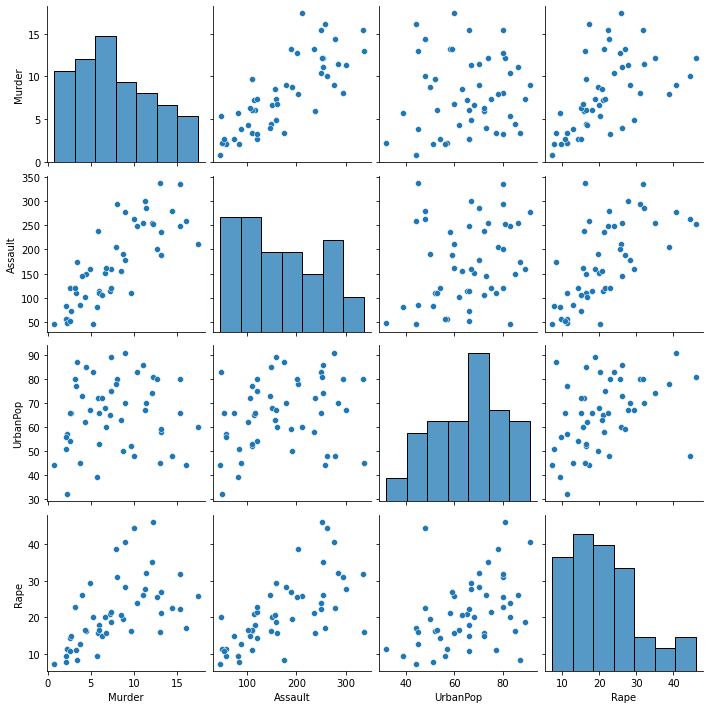

In [5]:
sns.pairplot(df)

# P. C. A

In [8]:
temp = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [9]:


X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]
y = df[['City']]

# scaling features
X_std = StandardScaler().fit_transform(X)

pca = PCA()
#applying P.C.A to features
principal_components = pca.fit_transform(X)

#saving P.C loading scores and explained variance ratio into dataframw
pca_df = pd.DataFrame(pca.components_,columns=temp.columns,index = ['PC 1','PC 2','PC 3','PC 4'])

pca_df['explained variance ratio'] = pca.explained_variance_ratio_

pca_df


,Murder,Assault,UrbanPop,Rape,explained variance ratio
PC 1,0.041704,0.995221,0.046336,0.075156,0.965534
PC 2,0.044822,0.058760,-0.976857,-0.200718,0.027817
PC 3,0.079891,-0.067570,-0.200546,0.974081,0.005800
PC 4,0.994922,-0.038938,0.058169,-0.072325,0.000849


PC1 has the highest explained variance ratio with 96.5% of variance of the data taken into account. 
The feature Assault  contributes the most to PC1 with a loading score of 0.99    
PC2 has the second highest explained variance ratio with 2.7% of variance of the data taken into account.


For our analysis both PC1 and PC2 effectively capture the varience of data with minimal infomation loss with a combined explained variance ratio of 99.2. Thus the features can be robustly analyised within a 2d space.

/var/folders/c6/q5ftb8xd3xdf1zvsrk7fgmx00000gn/T/ipykernel_23467/2893182692.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr.shape)).astype(np.bool)


<AxesSubplot:>

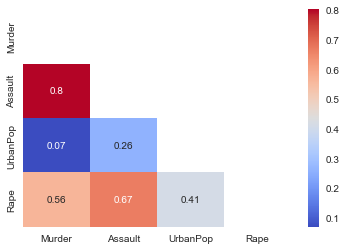

In [101]:

corr = df.drop(columns='cluster').corr()
mask_ut=np.triu(np.ones(corr.shape)).astype(np.bool)
sns.heatmap(corr,annot=True,mask=mask_ut,cmap='coolwarm')

/var/folders/c6/q5ftb8xd3xdf1zvsrk7fgmx00000gn/T/ipykernel_23467/1332221278.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr1.shape)).astype(np.bool)


<AxesSubplot:>

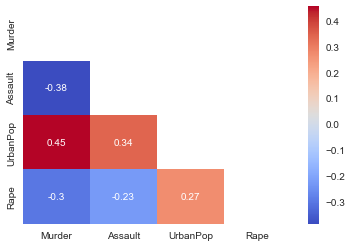

In [99]:
temp1 = pca_df.drop(columns='explained variance ratio')
corr1 = temp1.corr()
mask_ut=np.triu(np.ones(corr1.shape)).astype(np.bool)
sns.heatmap(corr1,annot=True,mask=mask_ut,cmap='coolwarm')


In [103]:
pcadata = pd.DataFrame(principal_components,index= df.City,columns = ['PC 1','PC 2','PC 3','PC 4'])
PC12=pcadata[['PC 1','PC 2']]

PC12

,PC 1,PC 2
City,,
Alabama,64.802164,11.448007
Alaska,92.827450,17.982943
Arizona,124.068216,-8.830403
Arkansas,18.340035,16.703911
California,107.422953,-22.520070
Colorado,34.975986,-13.719584
Connecticut,-60.887282,-12.932530
Delaware,66.731025,-1.353798
Florida,165.244370,-6.274690


# Agglomerative Clustering

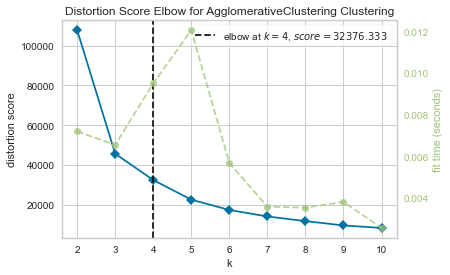

Model 1: euclidean - single - Silhouette score:  0.36778570060420407
Model 2: euclidean - complete - Silhouette score:  0.5175811498454717
Model 3: manhattan - single - Silhouette score:  0.2453509314985206
Model 4: manhattan - complete - Silhouette score:  0.5175811498454717


In [107]:
from yellowbrick.cluster import KElbowVisualizer

# fitting hierarchical clustering model and visualising optimal K parameter
hcluster = AgglomerativeClustering()

elbowplot = KElbowVisualizer(hcluster)
elbowplot.fit(PC12)        
elbowplot.show()


metrics =['euclidean','manhattan']
linkages = ['single','complete']


#fitting hierarchical clustering model with K = 4 to difffering distance metrics and linkages
modelnum = 0
for metric in metrics:
    for linkage in linkages:
    
        cluster = AgglomerativeClustering(n_clusters= 4 , affinity = metric, linkage=linkage)
        
        clustering = cluster.fit_predict(PC12)
        
        score = silhouette_score(PC12, clustering)
        
        modelnum += 1
        
        print(f'Model {modelnum}: {metric} - {linkage} - Silhouette score:  {score}')

Model 2 and 3 sees the greatest silhouette_score of 0.51 showing a relatively robust clustering compared to model 1 and 2.

# K-Means Clustering 

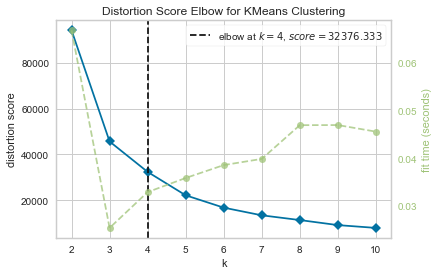

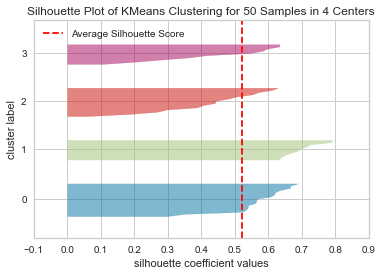

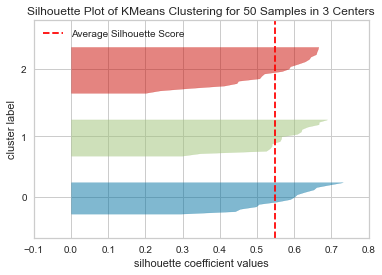

Silhouette score K = 3:  0.5478185279097637
Silhouette score K = 4:  0.5230284693049835


In [115]:
kcluster = KMeans()
# fitting k-means clustering model and visualising optimal K parameter
kelbowplot = KElbowVisualizer(kcluster)
kelbowplot.fit(PC12)        
kelbowplot.show()

#visualising Silhouette scores and cluster density 
kcluster = KMeans(4)
visualizer = SilhouetteVisualizer(kcluster, colors='yellowbrick')
visualizer.fit(PC12) 
fig.set_size_inches(15,10)
visualizer.show()

kcluster = KMeans(3)
visualizer = SilhouetteVisualizer(kcluster, colors='yellowbrick')
visualizer.fit(PC12) 
fig.set_size_inches(15,10)
visualizer.show()

#showing Silhouette score for both K=3 and K=4
for num in range(3,5):

    kcluster = KMeans(n_clusters = num)

    kfit = kcluster.fit_predict(PC12)


    score = silhouette_score(PC12,kfit)

    print(f'Silhouette score K = {num}:  {score}')

The elbow plot suggests a optimal K of 4 based on a distortion score of 32376. However when comparing the density of clusters in both K values we see that the K=4 model has  uneven distrubtions of samples across its 4 clusters. K = 3 has relatively speaking a more uniform distubtion of samples across its 3 clusters. Along with a Silhouette score of 0.54 compared to K=4's score of 0.52 this suggests that 3 is the optimal value for K for our KMeans model. 

/var/folders/c6/q5ftb8xd3xdf1zvsrk7fgmx00000gn/T/ipykernel_23467/2264773736.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC12['cluster'] = kfit.labels_


---------------------------------
Average Murder per cluster:
cluster
0     8.214286
1     4.270000
2    11.812500
Name: Murder, dtype: float64
---------------------------------
---------------------------------
Average Assault per cluster:
cluster
0    173.285714
1     87.550000
2    272.562500
Name: Assault, dtype: float64
---------------------------------
---------------------------------
Average UrbanPop per cluster:
cluster
0    70.642857
1    59.750000
2    68.312500
Name: UrbanPop, dtype: float64
---------------------------------
---------------------------------
Average Rape per cluster:
cluster
0    22.842857
1    14.390000
2    28.375000
Name: Rape, dtype: float64
---------------------------------


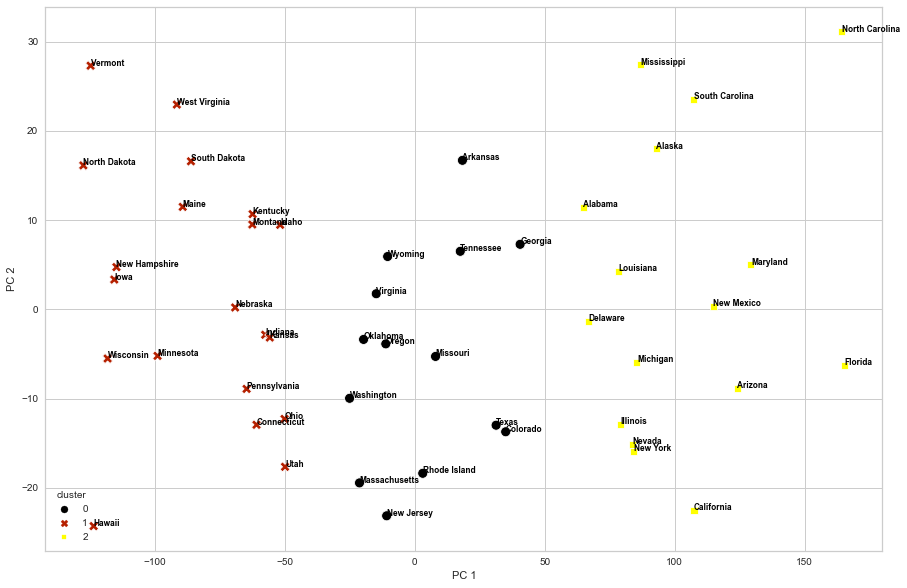

In [122]:
x = PC12[['PC 1']]
y = PC12[['PC 2']]


#Getting Cluster lables and adding to dataframe

kcluster = KMeans(n_clusters = 3)


kfit = kcluster.fit(PC12)

PC12['cluster'] = kfit.labels_
df['cluster'] = kfit.labels_


fig = plt.gcf()

#plotting scattergraph PC1 vs PC2

PCA_cluster = sns.scatterplot(data=PC12,x='PC 1', y ='PC 2',hue='cluster',palette='gnuplot',style='cluster',s=100)
#adding State name to data point lable
for i in range(0,pcadata.shape[0]):
     PCA_cluster.text(x = pcadata['PC 1'][i], y = pcadata['PC 2'][i],s =pcadata.index[i],horizontalalignment='left', 
     size='small', color='black', weight='semibold')

fig.set_size_inches(15,10)


#printing out averages of features per cluster
columns = ['Murder', 'Assault', 'UrbanPop', 'Rape']

for col in columns:
    print('---------------------------------')
    print(f'Average {col} per cluster:')
    print(df.groupby(["cluster"])[col].mean())
    
    print('---------------------------------')

# Cluster Analysis

Higher scores of PC 1 are correlated with higher levels of Assault. Lower scores of PC2 are associated with higher levels of urban population. Rape and murder are associated with simular ratios of PC1 and PC2.

Cluster 0 is associated with states with lowers levels of Assault, rape and murder and in general smaller populations compared to other clusters.

Cluster 1 is associated with states that have higher populations than 0 and higher average levels of rape and assault than both clusters 0 and 2


Cluster 2 is associated with states with the highest levels of population but smaller levels of rape and assault than cluster 2.


In [89]:
%%HTML
<div class='tableauPlaceholder' id='viz1675537708997' style='position: relative'><noscript><a href='#'><img alt='US Arrests Clustered ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USstatesCluster&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='USstatesCluster&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USstatesCluster&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1675537708997');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>